In [2]:
import numpy as np
import matplotlib.pyplot as plt
import dgl
import torch

DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


In [11]:
# create a graph 
g = dgl.graph(([0, 0, 0, 1, 0], [1, 2, 3, 4, 5]), num_nodes=7)


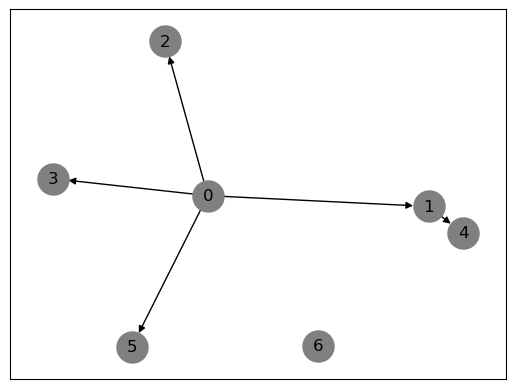

In [12]:
# use networkx to visualize
import networkx as nx
nx.draw_networkx(g.to_networkx(), node_size=500, node_color=[[.5, .5, .5,]])
plt.show()


In [17]:
g.adj_tensors(fmt = "csr")

(tensor([0, 4, 5, 5, 5, 5, 5, 5]),
 tensor([1, 2, 3, 5, 4]),
 tensor([0, 1, 2, 4, 3]))

In [23]:
# add 3 dimensional feature vectors for each node
g.ndata['x'] = torch.randn(7, 3)
# add 2 dimensional feature vectors for each edge
g.edata['w'] = torch.randn(5, 2)
# add 3*4 dimensional feature vectors for each node
g.ndata['y'] = torch.randn(7, 3, 4)

print(g.edata['w'])

tensor([[ 0.0347, -0.4749],
        [ 0.8504,  0.4706],
        [-0.9453, -0.4326],
        [ 0.2144, -0.2254],
        [-0.8092,  2.1193]])


In [27]:
# create a subgraph from node 0, 1, 3, 6
sg1 = g.subgraph([0, 1, 3, 6], relabel_nodes=False)

# visualize the subgraph
nx.draw_networkx(sg1.to_networkx(), node_size=500, node_color=[[.5, .5, .5,]])
plt.show()

AttributeError: 'DGLGraph' object has no attribute 'copy_from_parent'